In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the Olivetti faces dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.images.reshape((len(data.images), -1))  # Flatten images to vectors
y = data.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


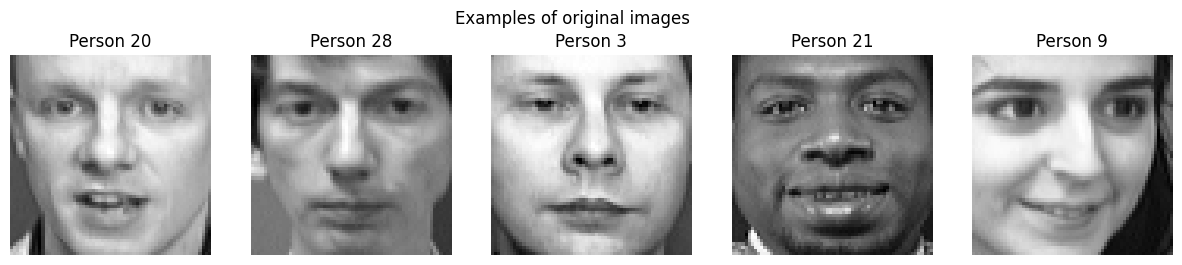

In [3]:
# Display some sample original images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(data.images[i], cmap='gray')
    ax.set_title(f"Person {data.target[i]}")
    ax.axis('off')
plt.suptitle("Examples of original images")
plt.savefig('original_images.png')
plt.show()

In [4]:
# Prepare to store accuracies for different models and n_components
n_components_range = range(1, 11)
accuracies = {'SVM_linear': [], 'SVM_rbf': [], 'RandomForest': [], 'AdaBoost': []}

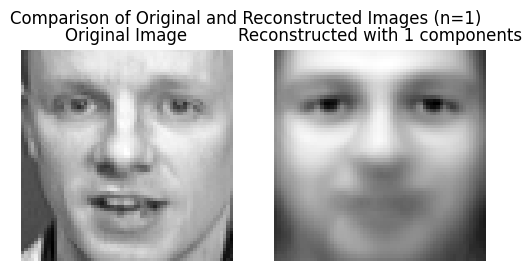

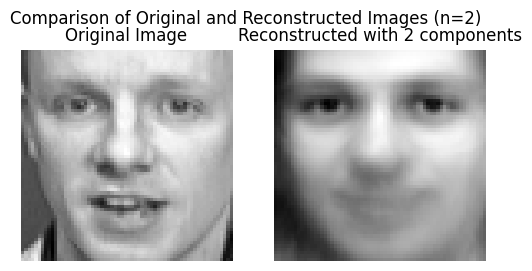

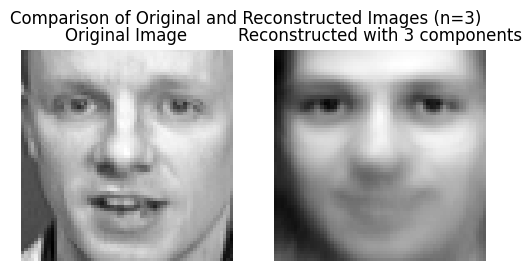

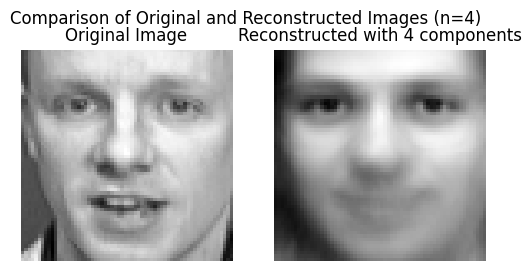

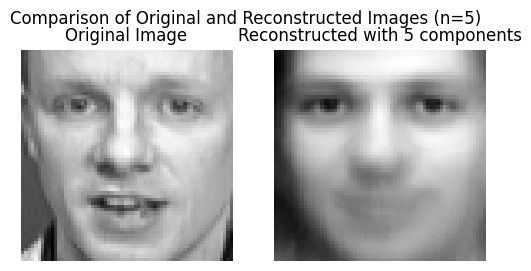

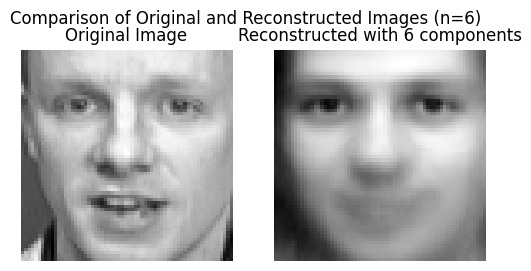

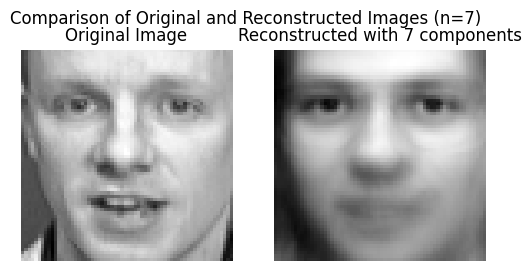

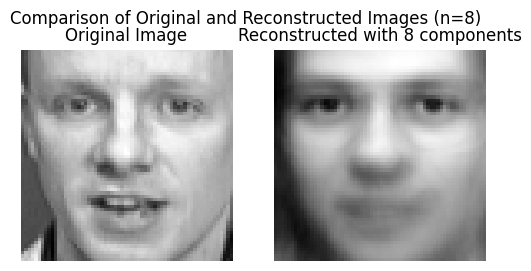

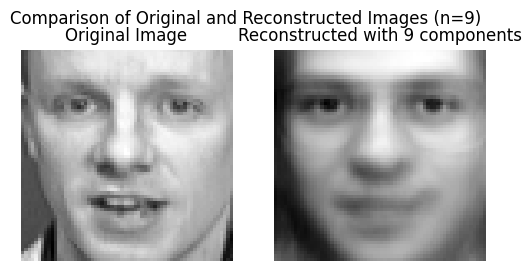

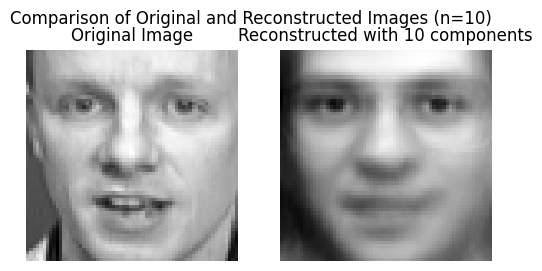

In [6]:
# Loop over different number of components
for n_components in n_components_range:
    # Apply PCA (Eigenfaces)
    pca = PCA(n_components=n_components, whiten=True)
    X_pca = pca.fit_transform(X)

    # Reconstruct and display for the first image
    X_reconstructed = pca.inverse_transform(X_pca)
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    axes[0].imshow(data.images[0], cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(X_reconstructed[0].reshape(64, 64), cmap='gray')
    axes[1].set_title(f"Reconstructed with {n_components} components")
    axes[1].axis('off')
    plt.suptitle(f"Comparison of Original and Reconstructed Images (n={n_components})")
    plt.savefig(f'reconstructed_n{n_components}.png')
    plt.show()

    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Train and evaluate SVM with linear kernel
    svm_linear = SVC(kernel='linear')
    svm_linear.fit(X_train, y_train)
    y_pred = svm_linear.predict(X_test)
    accuracies['SVM_linear'].append(accuracy_score(y_test, y_pred))

    # Train and evaluate SVM with rbf kernel
    svm_rbf = SVC(kernel='rbf')
    svm_rbf.fit(X_train, y_train)
    y_pred = svm_rbf.predict(X_test)
    accuracies['SVM_rbf'].append(accuracy_score(y_test, y_pred))

    # Train and evaluate Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies['RandomForest'].append(accuracy_score(y_test, y_pred))

    # Train and evaluate AdaBoost
    ada = AdaBoostClassifier(random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    accuracies['AdaBoost'].append(accuracy_score(y_test, y_pred))

In [7]:
# Print accuracies for each model and n_components
for model, acc_list in accuracies.items():
    print(f"{model}:")
    for n, acc in enumerate(acc_list, 1):
        print(f"  n={n}: Accuracy = {acc:.4f}")

SVM_linear:
  n=1: Accuracy = 0.0625
  n=2: Accuracy = 0.1500
  n=3: Accuracy = 0.2625
  n=4: Accuracy = 0.4500
  n=5: Accuracy = 0.5375
  n=6: Accuracy = 0.5875
  n=7: Accuracy = 0.6750
  n=8: Accuracy = 0.8000
  n=9: Accuracy = 0.8250
  n=10: Accuracy = 0.8500
  n=11: Accuracy = 0.0625
  n=12: Accuracy = 0.1500
  n=13: Accuracy = 0.2625
  n=14: Accuracy = 0.4500
  n=15: Accuracy = 0.5375
  n=16: Accuracy = 0.5875
  n=17: Accuracy = 0.6750
  n=18: Accuracy = 0.8000
  n=19: Accuracy = 0.8250
  n=20: Accuracy = 0.8500
SVM_rbf:
  n=1: Accuracy = 0.0750
  n=2: Accuracy = 0.1500
  n=3: Accuracy = 0.2875
  n=4: Accuracy = 0.4000
  n=5: Accuracy = 0.5125
  n=6: Accuracy = 0.6000
  n=7: Accuracy = 0.6375
  n=8: Accuracy = 0.7375
  n=9: Accuracy = 0.7750
  n=10: Accuracy = 0.8125
  n=11: Accuracy = 0.0750
  n=12: Accuracy = 0.1500
  n=13: Accuracy = 0.2875
  n=14: Accuracy = 0.4000
  n=15: Accuracy = 0.5125
  n=16: Accuracy = 0.6000
  n=17: Accuracy = 0.6375
  n=18: Accuracy = 0.7375
  n=19: A

In [8]:
# Determine the best model based on mean accuracy
mean_accuracies = {model: np.mean(acc_list) for model, acc_list in accuracies.items()}
best_model = max(mean_accuracies, key=mean_accuracies.get)
print(f"\nBest model: {best_model} with mean Accuracy = {mean_accuracies[best_model]:.4f}")


Best model: RandomForest with mean Accuracy = 0.5644


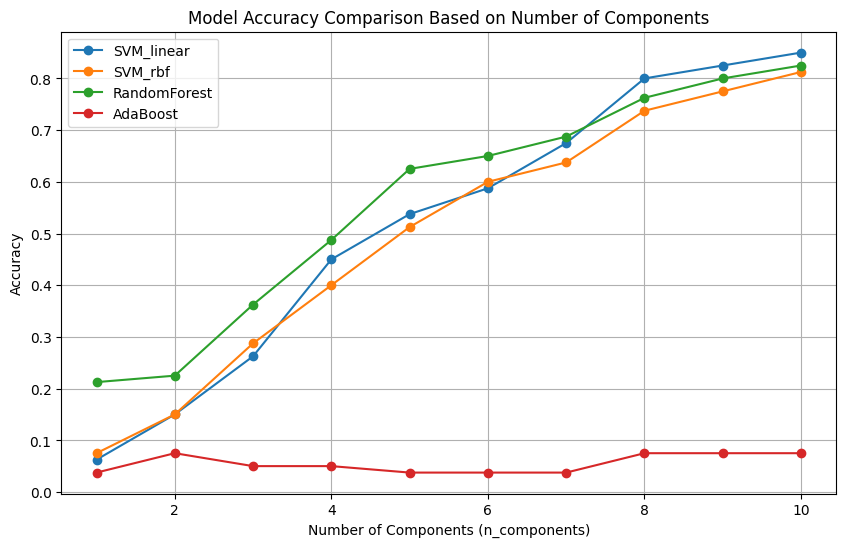

In [10]:
# Plot comparison of accuracies
plt.figure(figsize=(10, 6))
for model, acc_list in accuracies.items():

    plt.plot(n_components_range, acc_list[:len(n_components_range)], marker='o', label=model)
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Based on Number of Components')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_comparison.png')
plt.show()